In [1]:
# thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

2023-05-17 00:26:47.840062: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# # Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000, :], y_train[:50000]

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(50000, 28, 28)

In [4]:
# 3. Rehape lại dữ liệu cho đúng kích thước như keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
# 4. One-hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ', Y_train[0])

Dữ liệu ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
# 5. Định nghĩa model
model = Sequential()


In [7]:
# Thêm convolutional layer với 32 kernels, kích thước kernel 3 x 3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation = 'sigmoid', input_shape=(28, 28, 1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'sigmoid'))

# Thêm max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer chuyen tu tensor sang vector
model.add(Flatten())

# Thêm fully connected layers với 128 nodes và dùng hàm sigmoid 
model.add(Dense(128, activation ='tanh'))

# Ouput layer với 10 nodes và dùng hàm softmax function để chuyển sang xác suất 
model.add(Dense(10, activation = 'softmax'))

In [8]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức dùng 
# để tối ưu hàm loss_function
model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = 
     ['accuracy'])

In [9]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),  batch_size=50, epochs=10, verbose=1)

Epoch 1/10
1000/1000 [==============================] - 40s 39ms/step - loss: 0.9534 - accuracy: 0.7127 - val_loss: 0.0897 - val_accuracy: 0.9777
Epoch 2/10
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0776 - accuracy: 0.9780 - val_loss: 0.0638 - val_accuracy: 0.9827
Epoch 3/10
1000/1000 [==============================] - 39s 39ms/step - loss: 0.0456 - accuracy: 0.9868 - val_loss: 0.0498 - val_accuracy: 0.9854
Epoch 4/10
1000/1000 [==============================] - 39s 39ms/step - loss: 0.0299 - accuracy: 0.9918 - val_loss: 0.0479 - val_accuracy: 0.9857
Epoch 5/10
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 0.0479 - val_accuracy: 0.9844
Epoch 6/10
1000/1000 [==============================] - 42s 42ms/step - loss: 0.0145 - accuracy: 0.9961 - val_loss: 0.0401 - val_accuracy: 0.9881
Epoch 7/10
1000/1000 [==============================] - 42s 42ms/step - loss: 0.0105 - accuracy: 0.9972 - val_loss: 0.0395 -

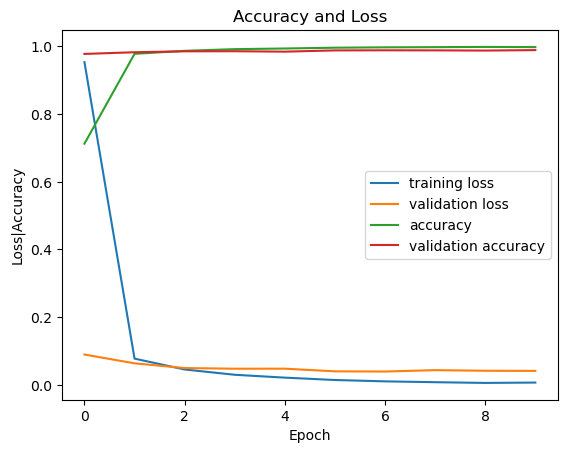

In [10]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [11]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose = 0)
print(score)


[0.03641629219055176, 0.9887999892234802]


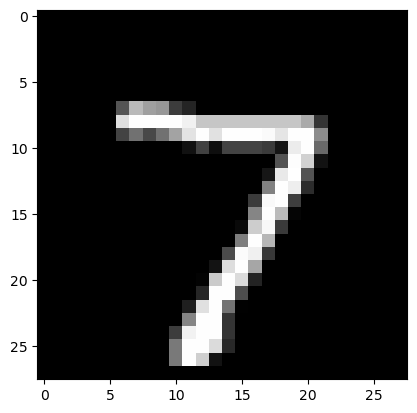

In [12]:
# 10. Dự đoán ảnh
plt.imshow(X_test[0].reshape(28, 28), cmap ='gray')
